In [4]:
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.model_selection import train_test_split
import os
import tempfile


import matplotlib.pyplot as plt
import matplotlib.cm as cm
import cv2
import seaborn as sns

from tensorflow import keras
from tensorflow.keras import layers,models
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Dropout, Resizing,Rescaling,InputLayer, Conv2D, BatchNormalization, MaxPool2D, Dropout, Flatten
from tensorflow.keras.callbacks import Callback, EarlyStopping,ModelCheckpoint
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.applications import EfficientNetB4
import tensorflow_probability as tfp
from tensorflow.keras import Model
from tensorflow.keras.layers.experimental import preprocessing
from tensorflow.keras.regularizers import L2
from tensorflow.keras.metrics import CategoricalAccuracy, TopKCategoricalAccuracy
from tensorflow.keras.layers.experimental.preprocessing import RandomRotation, RandomFlip, RandomContrast



from pathlib import Path
import os.path

from sklearn.metrics import classification_report, confusion_matrix


ImportError: cannot import name 'Resizing' from 'tensorflow.keras.layers' (unknown location)

In [ ]:
pip install tensorflow_probability

In [5]:
pip freeze

absl-py==1.0.0Note: you may need to restart the kernel to use updated packages.

anyio==3.6.2
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
astor==0.8.1
attrs==22.1.0
backcall==0.2.0
beautifulsoup4==4.11.1
bleach==5.0.1
cached-property==1.5.2
certifi==2021.10.8
cffi==1.15.1
charset-normalizer==2.0.12
click==8.0.3
colorama==0.4.4
cycler==0.11.0
debugpy==1.6.3
decorator==5.1.1
defusedxml==0.7.1
entrypoints==0.4
fastjsonschema==2.16.2
Flask==2.2.5
future==0.18.2
gast==0.5.3
google-pasta==0.2.0
grpcio==1.43.0
gTTS==2.2.3
h5py==2.10.0
idna==3.3
importlib-metadata==4.11.1
importlib-resources==5.10.0
imutils==0.5.3
ipykernel==6.16.2
ipython==7.34.0
ipython-genutils==0.2.0
ipywidgets==8.0.2
itsdangerous==2.1.2
jedi==0.18.1
Jinja2==3.1.2
joblib==1.1.0
jsonschema==4.17.0
jupyter==1.0.0
jupyter-console==6.4.4
jupyter-server==1.23.0
jupyter_client==7.4.4
jupyter_core==4.11.2
jupyterlab-pygments==0.2.2
jupyterlab-widgets==3.0.3
Keras==2.3.1
Keras-Applications==1.0.8
Keras-Preprocessing==1.1.2
ki

In [6]:
pip install tensorflow==2.14.0

Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement tensorflow==2.14.0 (from versions: 1.13.1, 1.13.2, 1.14.0, 1.15.0, 1.15.2, 1.15.3, 1.15.4, 1.15.5, 2.0.0, 2.0.1, 2.0.2, 2.0.3, 2.0.4, 2.1.0, 2.1.1, 2.1.2, 2.1.3, 2.1.4, 2.2.0, 2.2.1, 2.2.2, 2.2.3, 2.3.0, 2.3.1, 2.3.2, 2.3.3, 2.3.4, 2.4.0, 2.4.1, 2.4.2, 2.4.3, 2.4.4, 2.5.0, 2.5.1, 2.5.2, 2.5.3, 2.6.0rc0, 2.6.0rc1, 2.6.0rc2, 2.6.0, 2.6.1, 2.6.2, 2.6.3, 2.6.4, 2.6.5, 2.7.0rc0, 2.7.0rc1, 2.7.0, 2.7.1, 2.7.2, 2.7.3, 2.7.4, 2.8.0rc0, 2.8.0rc1, 2.8.0, 2.8.1, 2.8.2, 2.8.3, 2.8.4, 2.9.0rc0, 2.9.0rc1, 2.9.0rc2, 2.9.0, 2.9.1, 2.9.2, 2.9.3, 2.10.0rc0, 2.10.0rc1, 2.10.0rc2, 2.10.0rc3, 2.10.0, 2.10.1, 2.11.0rc0, 2.11.0rc1, 2.11.0rc2, 2.11.0)
ERROR: No matching distribution found for tensorflow==2.14.0


In [18]:
pip install tensorflow==2.11.0

     -------------------------------------- 266.3/266.3 MB 3.6 MB/s eta 0:00:00
     ---------------------------------------- 14.0/14.0 MB 6.1 MB/s eta 0:00:00
     ---------------------------------------- 65.5/65.5 kB 3.5 MB/s eta 0:00:00
     ---------------------------------------- 6.0/6.0 MB 6.8 MB/s eta 0:00:00
     -------------------------------------- 439.2/439.2 kB 6.9 MB/s eta 0:00:00
     ---------------------------------------- 1.7/1.7 MB 4.9 MB/s eta 0:00:00
     ---------------------------------------- 1.5/1.5 MB 6.3 MB/s eta 0:00:00
     -------------------------------------- 781.3/781.3 kB 7.1 MB/s eta 0:00:00
     -------------------------------------- 181.3/181.3 kB 5.3 MB/s eta 0:00:00
     ---------------------------------------- 83.9/83.9 kB 4.9 MB/s eta 0:00:00
     -------------------------------------- 151.7/151.7 kB 4.6 MB/s eta 0:00:00
   ---------------------------------------- 24.4/24.4 MB 2.7 MB/s eta 0:00:00
   ---------------------------------------- 183.

  You can safely remove it manually.
ERROR: Could not install packages due to an OSError: [WinError 5] Access is denied: 'c:\\users\\hp\\appdata\\local\\programs\\python\\python37\\Lib\\site-packages\\tensorflow\\python\\_pywrap_tensorflow_internal.pyd'
Consider using the `--user` option or check the permissions.



**Data Loading**

In [2]:
ls

 Volume in drive C is Windows
 Volume Serial Number is 5EA6-816D

 Directory of C:\Users\HP\Desktop\New folder

07-11-2023  10:37    <DIR>          .
07-11-2023  10:35    <DIR>          ..
07-11-2023  10:37    <DIR>          .ipynb_checkpoints
07-11-2023  10:34       107,330,814 archive.zip
07-11-2023  10:29         3,446,147 pest_prediction.ipynb
               2 File(s)    110,776,961 bytes
               3 Dir(s)  14,186,246,144 bytes free


In [13]:
data=''
class_name=["ants",'bees','beetle','catterpillar','earthworms','earwig','grasshopper','moth','slug','snail','wasp','weevil']

In [14]:
configuration={'batchsize':32,'img_size':224,
               'learningrate':0.001,
               'n_epoches':12,
               "num_classes":12,
               'droupoutrate':0.0,
               'regularization_rate':0.0 ,
               'num_filters':6,
               "kernelsize":3,
               "n_strides":1,
               'poolsize':2,
               'N_DENSE_1':100,
               'N_DENSE_2':10,
}

In [19]:
def convert_path_to_df(dataset):
    image_dir = Path(dataset)

    # Get filepaths and labels
    filepaths = list(image_dir.glob(r'**/*.JPG')) + list(image_dir.glob(r'**/*.jpg')) + list(image_dir.glob(r'**/*.png')) + list(image_dir.glob(r'**/*.PNG'))

    labels = list(map(lambda x: os.path.split(os.path.split(x)[0])[1], filepaths))

    filepaths = pd.Series(filepaths, name='Filepath').astype(str)
    labels = pd.Series(labels, name='Label')

    # Concatenate filepaths and labels
    image_df = pd.concat([filepaths, labels], axis=1)
    return image_df

image_df = convert_path_to_df(data)


In [11]:
!python --version

Python 3.7.0


In [20]:
image_df["Label"].value_counts()

bees            1000
snail           1000
ants             998
wasp             996
moth             994
weevil           970
grasshopper      970
earwig           932
catterpillar     868
beetle           832
slug             782
earthworms       646
Name: Label, dtype: int64

In [12]:
from pathlib import Path

In [29]:
image_df=image_df[image_df["Label"]!="68bf1a3a25dd33c220608edb04f40edb0754017e"]

In [21]:
train_df, test_df = train_test_split(image_df, test_size=0.2, shuffle=True, random_state=42)


In [22]:
train_df

,Filepath,Label
7415,archive\earthworms\earthworms (174).jpg,earthworms
5665,archive\ants\ants (261).jpg,ants
8673,archive\moth\moth (161).jpg,moth
292,archive\ants\ants (362).jpg,ants
8117,archive\earwig\earwig (97).jpg,earwig
...,...,...
5734,archive\ants\ants (323).jpg,ants
5191,archive\weevil\Weevil (273).jpg,weevil
5390,archive\weevil\Weevil (452).jpg,weevil
860,archive\bees\bees (425).jpg,bees


In [24]:
def save_images_from_df(image_df, output_dir):
    for index, row in image_df.iterrows():
        filepath = row['Filepath']
        label = row['Label']
        
        image = cv2.imread(filepath)
        output_subdir = os.path.join(output_dir, label)
        os.makedirs(output_subdir, exist_ok=True)
        
        output_filepath = os.path.join(output_subdir, os.path.basename(filepath))
        cv2.imwrite(output_filepath, image)
        
# Provide the DataFrame and the output directory
train_data='train'
train_data = save_images_from_df(train_df, train_data)  # Change this to your desired output directory

test_directory = 'test'
save_images_from_df(test_df, test_directory )

In [17]:
pwd

'/home/abhinaythiramdas/Downloads/pest_prediction'

In [25]:
train_data='train /'

In [26]:
test_data='test/'

In [63]:
 8791-1758


7033

In [15]:
pip freeze

absl-py==2.0.0
aiofiles==23.2.1
aiohttp==3.8.5
aiosignal==1.3.1
albumentations==1.3.1
altair==5.0.1
annotated-types==0.5.0
anyio==3.7.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asn1crypto==1.5.1
asttokens==2.2.1
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
backcall==0.2.0
bar-chart-race==0.1.0
bcrypt==4.0.1
beautifulsoup4==4.12.2
bleach==6.0.0
blinker==1.6.2
boto==2.49.0
Brlapi==0.8.2
cachetools==5.3.1
certifi==2023.7.22
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
click==8.1.6
cloudpickle==2.0.0
cmake==3.27.0
coloredlogs==15.0.1
comm==0.1.3
contourpy==1.0.7
cryptography==41.0.2
cupshelpers==1.0
cycler==0.11.0
dacite==1.8.1
datasets==2.14.0
dbus-python==1.2.16
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
diffusers==0.21.2
dill==0.3.7
distro==1.5.0
distro-info==1.0
dm-tree==0.1.8
dnspython==2.3.0
elastic-transport==8.4.0
elasticsearch==8.8.0
elasticsearch5==5.5.6
et-xmlfile==1.1.0
evaluate==0.4.0
exceptiongroup==1.1.1
executing==1.2.0
fabric==3

In [27]:
train_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data,
    labels='inferred',
    label_mode='categorical',
    class_names=class_name,
    color_mode='rgb',
    batch_size=configuration['batchsize'],
    image_size=(configuration['img_size'], configuration['img_size']),
    shuffle=True,
    seed=99,
    validation_split=0.15,  
    subset='training',     
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    train_data,
    labels='inferred',
    label_mode='categorical',
    class_names=class_name,
    color_mode='rgb',
    batch_size=configuration['batchsize'],
    image_size=(configuration['img_size'], configuration['img_size']),
    shuffle=True,
    seed=99,
    validation_split=0.15, 
    subset='validation',  
)


AttributeError: module 'tensorflow.python.keras.api._v1.keras.utils' has no attribute 'image_dataset_from_directory'

In [36]:

test_dataset = tf.keras.utils.image_dataset_from_directory(
    test_data,
    labels='inferred',
    label_mode='categorical',
    class_names=class_name,
    color_mode='rgb',
    batch_size=configuration['batchsize'],
    image_size=(configuration['img_size'], configuration['img_size']),
    shuffle=True,
    seed=99,
)


Found 4238 files belonging to 12 classes.


In [30]:
!python3 --version

Python was not found; run without arguments to install from the Microsoft Store, or disable this shortcut from Settings > Manage App Execution Aliases.


In [37]:
tf.data.experimental.cardinality(test_dataset).numpy()

133

# **Data Visualization**

/tmp/ipykernel_453301/1558906605.py:7: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax=plt.subplot(plot_pics,plot_pics,i+1)


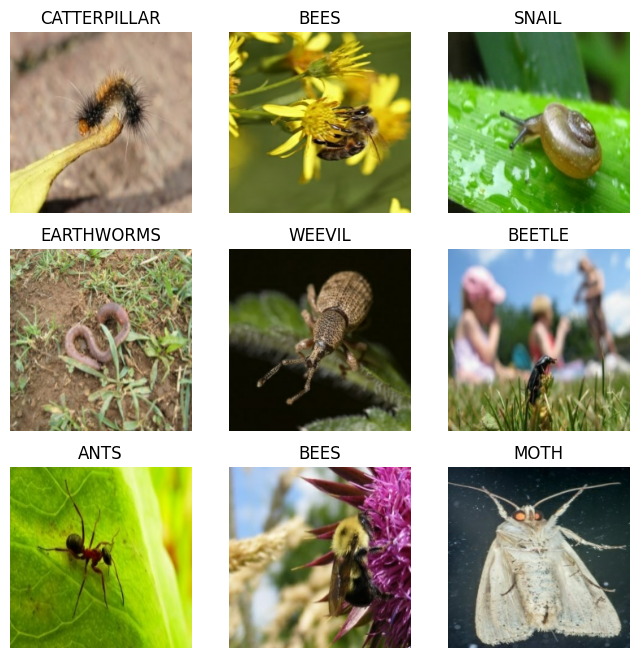

In [38]:
plot_pics=3

plt.figure(figsize=(8,8))
for images,labels in  train_dataset.take(plot_pics):
    for i in range(plot_pics*plot_pics):
        plt.axis("off")
        ax=plt.subplot(plot_pics,plot_pics,i+1)
        plt.imshow(images[i]/255.)
        plt.title(class_name[tf.argmax(labels[i],axis=0).numpy()].upper())


           

In [39]:
class_name[tf.argmax(labels[i],axis=0).numpy()].upper()

'MOTH'

In [40]:
vali_dataset=(
   val_dataset
    .prefetch(tf.data.AUTOTUNE)


)

## **MODEL**

In [41]:
pretrained_model = tf.keras.applications.efficientnet.EfficientNetB4(
    input_shape=(256, 256, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [42]:
pretrained_model = tf.keras.applications.ResNet50(
    input_shape=(224, 224, 3),
    include_top=False,
    weights='imagenet',
    pooling='max'
)

pretrained_model.trainable = False

In [43]:
numbers = [1000, 1000, 998, 996, 994, 970, 970, 932, 868, 832, 782, 646]

# Calculate the sum
total_sum = sum(numbers)

# Print the sum
print("The sum of the numbers is:", total_sum)

The sum of the numbers is: 10988


In [44]:
lenet_model = tf.keras.Sequential([
    InputLayer(input_shape=(configuration["img_size"], configuration["img_size"], 3)),


   pretrained_model,
    BatchNormalization(),
    Dense(configuration["N_DENSE_1"], activation="relu",
          kernel_regularizer=L2(configuration['regularization_rate'])),
    BatchNormalization(),
      Dense(configuration["N_DENSE_2"], activation="relu",
          kernel_regularizer=L2(configuration['regularization_rate'])),
     BatchNormalization(),
      Dense(configuration["num_classes"], activation="softmax" )

])
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 resnet50 (Functional)       (None, 2048)              23587712  
                                                                 
 batch_normalization (Batch  (None, 2048)              8192      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 100)               204900    
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                                 
 batch_normalization_2 (Bat  (None, 10)                4

### **loss**

In [45]:
loss_funcion=tf.keras.losses.CategoricalCrossentropy(
    from_logits=False,

)

In [46]:

metrics=[CategoricalAccuracy(name= 'accuracy'),TopKCategoricalAccuracy(k=2,name='top_k_accuracy')]

In [47]:
lenet_model.compile(
    optimizer=Adam(learning_rate=configuration['learningrate']),
                   loss=loss_funcion,
                   metrics=metrics

)

In [52]:
from functools import partial
# from albumentations import (
#     Compose, RandomBrightness, JpegCompression, HueSaturationValue, RandomContrast, HorizontalFlip,
#     Rotate
# )
# AUTOTUNE = tf.data.experimental.AUTOTUNE

**Data Augmentation**

In [48]:
configuration["img_size"]

224

In [49]:
augment_layers

NameError: name 'augment_layers' is not defined

In [53]:
# Define a custom preprocessing function
augment_layers = tf.keras.Sequential([
    RandomRotation(factor=(-0.25, 0.2501)),
   RandomFlip("horizontal_and_vertical",seed=42),  # Specify a seed for reproducibility
])


resize_rescale=tf.keras.Sequential(
    Resizing(configuration['img_size'],configuration['img_size']),
    Rescaling(1./255)
)

def process_data(image, label):
    # Apply augmentation layers to the image
 # imag= tf.image.rgb_to_grayscale(image)

 # augmented_imag =  tf.image.random_contrast(
   #  imag, lower=0.1, upper=0.9, seed=42
  #)
  augmented_image=augment_layers(image)
    # Resize the augmented image
  resized_image = tf.image.resize(augmented_image, size=(configuration["img_size"], configuration["img_size"]))

  return resized_image, label

# Apply augmentation and preprocessing to the dataset
training_dataset = (
    train_dataset.
    shuffle(1000)
    .map(partial(process_data),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    #.batch(configuration['batchsize'])
   # .prefetch(tf.data.AUTOTUNE)
)


In [54]:
validation_dataset = (
    val_dataset.
    shuffle(1000)
    .map(partial(process_data),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    #.batch(configuration['batchsize'])
   # .prefetch(tf.data.AUTOTUNE)
)


In [55]:
len(train_dataset)

146

In [56]:
len(training_dataset)

146

In [57]:
len(test_dataset)

133

**CUTMIX**


In [88]:
# IM_SIZE=256
# def box(lamda):
#     r_x = tf.cast(tfp.distributions.Uniform(0, IM_SIZE).sample(1)[0], dtype=tf.int32)
#     r_y = tf.cast(tfp.distributions.Uniform(8, IM_SIZE - 8).sample(1)[0], dtype=tf.int32)

#     r_w = tf.cast(IM_SIZE * tf.math.sqrt(1 - lamda), dtype=tf.int32)
#     r_h = tf.cast(IM_SIZE * tf.math.sqrt(1 - lamda), dtype=tf.int32)

#     r_x = tf.clip_by_value(r_x, r_w // 2,configuration['img_size'] - r_w // 2)
#     r_y = tf.clip_by_value(r_y, r_h // 2, configuration['img_size'] - r_h // 2)

#     x_b_r = tf.clip_by_value(r_x + r_w // 2, 0, configuration['img_size'])
#     y_b_r = tf.clip_by_value(r_y + r_h // 2, 0, configuration['img_size'])

#     r_w = x_b_r - r_x
#     if r_w == 0:
#         r_w = 1

#     r_h = y_b_r - r_y
#     if r_h == 0:
#         r_h = 1

#     return r_y, r_x, r_h, r_w


In [89]:


# def cutmix(train_dataset_1, train_dataset_2):
#     (image_1, label_1), (image_2, label_2) = train_dataset_1, train_dataset_2

#     lamda = tfp.distributions.Beta(0.2, 0.2)
#     lamda_value = lamda.sample(1)[0]

#     ry, rx, r_h, r_w = box(lamda_value)

#     crop_2 = tf.image.crop_to_bounding_box(image_2, ry, rx, r_h, r_w)
#     pad_2 = tf.image.pad_to_bounding_box(crop_2, ry, rx, configuration['img_size'] ,configuration['img_size'])

#     crop_1 = tf.image.crop_to_bounding_box(image_1, ry, rx, r_h, r_w)
#     pad_1 = tf.image.pad_to_bounding_box(crop_1, ry, rx, configuration['img_size'], configuration['img_size'])

#     cutmixed_image = image_1 - pad_1 + pad_2


#     lamda_value = tf.cast(1 - (r_w * r_h) / (configuration['img_size']*configuration['img_size']), dtype=tf.float32)

#     cutmixed_label = lamda_value * tf.cast(label_1, dtype=tf.float32) + (1 - lamda_value) * tf.cast(label_2, dtype=tf.float32)

#     return cutmixed_image, cutmixed_label


In [68]:
# train_dataset_1 = train_dataset.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)
# train_dataset_2 = train_dataset.map(process_data, num_parallel_calls=tf.data.AUTOTUNE)

# mixed_dataset = tf.data.Dataset.zip((train_dataset_1, train_dataset_2))


In [69]:
# cutmix_dataset = (
#     mixed_dataset.
#     shuffle(1000)
#     .map(partial(cutmix),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
#     #.batch(configuration['batchsize'])
# )

In [58]:
print("GPU available:", tf.config.list_physical_devices('GPU'))


GPU available: []


In [59]:
pip freeze

absl-py==2.0.0
aiofiles==23.2.1
aiohttp==3.8.5
aiosignal==1.3.1
albumentations==1.3.1
altair==5.0.1
annotated-types==0.5.0
anyio==3.7.1
argon2-cffi==21.3.0
argon2-cffi-bindings==21.2.0
arrow==1.2.3
asn1crypto==1.5.1
asttokens==2.2.1
astunparse==1.6.3
async-timeout==4.0.2
attrs==23.1.0
backcall==0.2.0
bar-chart-race==0.1.0
bcrypt==4.0.1
beautifulsoup4==4.12.2
bleach==6.0.0
blinker==1.6.2
boto==2.49.0
Brlapi==0.8.2
cachetools==5.3.1
certifi==2023.7.22
cffi==1.15.1
chardet==4.0.0
charset-normalizer==3.2.0
click==8.1.6
cloudpickle==2.0.0
cmake==3.27.0
coloredlogs==15.0.1
comm==0.1.3
contourpy==1.0.7
cryptography==41.0.2
cupshelpers==1.0
cycler==0.11.0
dacite==1.8.1
datasets==2.14.0
dbus-python==1.2.16
debugpy==1.6.7
decorator==5.1.1
defusedxml==0.7.1
diffusers==0.21.2
dill==0.3.7
distro==1.5.0
distro-info==1.0
dm-tree==0.1.8
dnspython==2.3.0
elastic-transport==8.4.0
elasticsearch==8.8.0
elasticsearch5==5.5.6
et-xmlfile==1.1.0
evaluate==0.4.0
exceptiongroup==1.1.1
executing==1.2.0
fabric==3

In [60]:

history = lenet_model.fit(
        training_dataset,
            epochs=configuration['n_epoches'],
            verbose=1,
            validation_data=validation_dataset
        )

Epoch 1/12
146/146 [==============================] - 293s 2s/step - loss: 1.5940 - accuracy: 0.5732 - top_k_accuracy: 0.6989 - val_loss: 1.1389 - val_accuracy: 0.6748 - val_top_k_accuracy: 0.7888
Epoch 2/12
146/146 [==============================] - 411s 3s/step - loss: 1.0719 - accuracy: 0.7244 - top_k_accuracy: 0.8317 - val_loss: 0.9029 - val_accuracy: 0.7403 - val_top_k_accuracy: 0.8519
Epoch 3/12
146/146 [==============================] - 352s 2s/step - loss: 0.8202 - accuracy: 0.7848 - top_k_accuracy: 0.8756 - val_loss: 0.7415 - val_accuracy: 0.7852 - val_top_k_accuracy: 0.8786
Epoch 4/12
146/146 [==============================] - 439s 3s/step - loss: 0.6936 - accuracy: 0.8011 - top_k_accuracy: 0.8955 - val_loss: 0.6861 - val_accuracy: 0.7973 - val_top_k_accuracy: 0.8896
Epoch 5/12
146/146 [==============================] - 365s 2s/step - loss: 0.6187 - accuracy: 0.8150 - top_k_accuracy: 0.9105 - val_loss: 0.6549 - val_accuracy: 0.7925 - val_top_k_accuracy: 0.8944
Epoch 6/12
146/

In [151]:
test_dataset

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None, 12), dtype=tf.float32, name=None))>

In [106]:
testing_dataset = (
    test_dataset.
    shuffle(1000)
    .map(partial(process_data),num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    #.batch(configuration['batchsize'])
   # .prefetch(tf.data.AUTOTUNE)
)


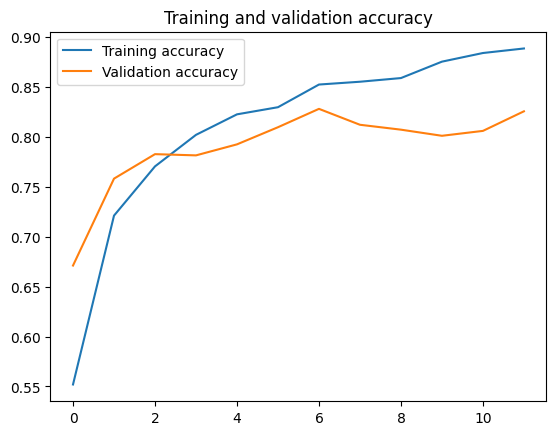

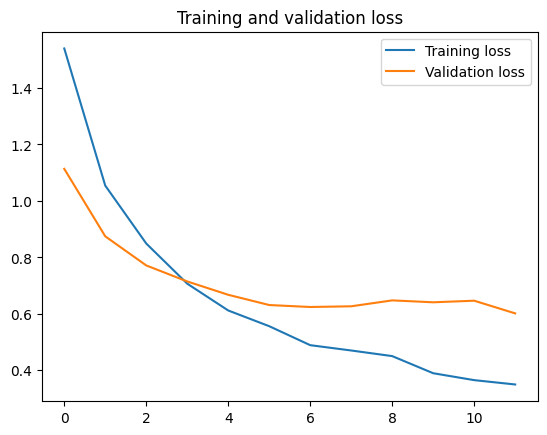

In [170]:
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(accuracy))
plt.plot(epochs, accuracy, label='Training accuracy')
plt.plot(epochs, val_accuracy, label='Validation accuracy')

plt.title('Training and validation accuracy')
plt.legend()
plt.figure()
plt.plot(epochs, loss,  label='Training loss')
plt.plot(epochs, val_loss, label='Validation loss')

plt.title('Training and validation loss')
plt.legend()
plt.show()

Prediction on Test Data

In [116]:
# Predict the label of the test_images
pred = lenet_model.predict(testing_dataset)


83/83 [==============================] - 122s 1s/step


In [117]:
pred

array([[1.4939876e-02, 6.1083806e-06, 1.6606291e-04, ..., 4.2799006e-06,
        7.2505456e-05, 6.7014320e-05],
       [1.9974739e-03, 9.2938101e-01, 5.4318018e-02, ..., 6.4639421e-04,
        8.9109602e-04, 3.2205654e-03],
       [7.2292084e-01, 7.1367146e-03, 6.5880910e-02, ..., 1.0506070e-03,
        1.7935197e-03, 6.2528532e-03],
       ...,
       [2.7725490e-02, 8.2612306e-01, 6.9107056e-02, ..., 9.9529175e-04,
        2.8348673e-02, 1.7277754e-03],
       [6.4085973e-05, 4.6998693e-04, 1.5813708e-05, ..., 9.9492395e-01,
        8.5688116e-06, 2.2903891e-04],
       [8.0126578e-05, 1.0433550e-05, 6.8962140e-06, ..., 1.2111939e-05,
        1.5667516e-07, 9.9972421e-01]], dtype=float32)

In [76]:

# lenet_model.evaluate(test_dataset)

35/35 [==============================] - 96s 3s/step - loss: 0.2838 - accuracy: 0.9245 - top_k_accuracy: 0.9645


[0.283775269985199, 0.9244768023490906, 0.9645131826400757]

In [153]:
predicted=[]
labels=[]
from tqdm.auto import tqdm
for im, label in tqdm(test_dataset):
    predicted.append(lenet_model(im).numpy())
    labels.append(label.numpy())

  0%|          | 0/83 [00:00<?, ?it/s]

In [156]:
labels[0].shape

(32, 12)

In [157]:
labels

[array([[0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
        [1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0.],
        [0., 0

In [150]:
predicted[:-1]

[array([[5.29285446e-02, 1.55165454e-03, 5.68257365e-03, 4.96687600e-04,
         1.91490049e-03, 6.86526706e-04, 1.70464604e-03, 1.49313564e-04,
         9.02668515e-04, 1.23252961e-04, 4.08820779e-05, 9.33818340e-01],
        [9.91723955e-01, 1.66467181e-03, 6.74075098e-04, 7.17610383e-05,
         2.22345661e-05, 3.39292130e-03, 1.84472490e-04, 4.09147797e-05,
         1.01551459e-05, 1.15644396e-03, 6.57620185e-05, 9.92734917e-04],
        [1.94056047e-04, 1.80192670e-04, 1.71738313e-04, 9.87171948e-01,
         4.24892860e-05, 7.11428700e-03, 1.58645841e-03, 1.50537198e-06,
         5.56857049e-05, 3.00808111e-03, 4.57435643e-04, 1.61023709e-05],
        [5.19915775e-04, 1.54209425e-04, 4.10792913e-04, 5.19322430e-06,
         4.76704690e-06, 9.82552650e-04, 1.75425084e-04, 8.81822780e-05,
         3.50079563e-06, 2.75283446e-06, 9.97620285e-01, 3.24732864e-05],
        [9.39558223e-02, 1.66603349e-04, 2.10063625e-03, 9.15347249e-04,
         2.43911680e-04, 8.04297924e-01, 1.2159

In [158]:
pred= np.concatenate([np.argmax(predicted[:-1],axis=-1).flatten(),np.argmax(predicted[-1],axis=-1).flatten()])
lab= np.concatenate([np.argmax(labels[:-1],axis=-1).flatten(),np.argmax(labels[-1],axis=-1).flatten()])

In [164]:
lab.shape

(2645,)

In [168]:
from sklearn.metrics import classification_report

# Generate a classification report
report = classification_report(lab, pred, output_dict=True)

# Convert the classification report to a DataFrame
report_df = pd.DataFrame(report).transpose()

# Display the DataFrame
print(report_df)

              precision    recall  f1-score      support
0              0.927126  0.938525  0.932790   244.000000
1              0.925000  0.956897  0.940678   232.000000
2              0.855491  0.783069  0.817680   189.000000
3              0.892241  0.911894  0.901961   227.000000
4              0.915152  0.949686  0.932099   159.000000
5              0.889447  0.776316  0.829040   228.000000
6              0.880000  0.932203  0.905350   236.000000
7              0.975000  0.987342  0.981132   237.000000
8              0.958333  0.904494  0.930636   178.000000
9              0.979339  0.987500  0.983402   240.000000
10             0.951220  0.951220  0.951220   246.000000
11             0.930041  0.986900  0.957627   229.000000
accuracy       0.924764  0.924764  0.924764     0.924764
macro avg      0.923199  0.922170  0.921968  2645.000000
weighted avg   0.924275  0.924764  0.923821  2645.000000


In [167]:
report


'              precision    recall  f1-score   support\n\n           0       0.93      0.94      0.93       244\n           1       0.93      0.96      0.94       232\n           2       0.86      0.78      0.82       189\n           3       0.89      0.91      0.90       227\n           4       0.92      0.95      0.93       159\n           5       0.89      0.78      0.83       228\n           6       0.88      0.93      0.91       236\n           7       0.97      0.99      0.98       237\n           8       0.96      0.90      0.93       178\n           9       0.98      0.99      0.98       240\n          10       0.95      0.95      0.95       246\n          11       0.93      0.99      0.96       229\n\n    accuracy                           0.92      2645\n   macro avg       0.92      0.92      0.92      2645\nweighted avg       0.92      0.92      0.92      2645\n'

[[229   1   1   0   0   5   6   0   0   0   2   0]
 [  0 222   2   1   0   1   1   0   0   0   4   1]
 [  3   3 148   4   0   5  11   0   0   0   2  13]
 [  0   3   3 207   6   3   2   0   1   1   0   1]
 [  2   0   1   3 151   1   0   0   0   1   0   0]
 [  8   5  11   7   4 177   7   1   3   0   4   1]
 [  0   0   1   8   0   4 220   1   2   0   0   0]
 [  0   0   1   0   1   0   1 234   0   0   0   0]
 [  1   0   3   2   2   2   1   3 161   3   0   0]
 [  0   0   0   0   1   0   0   1   1 237   0   0]
 [  4   5   0   0   0   1   1   0   0   0 234   1]
 [  0   1   2   0   0   0   0   0   0   0   0 226]]


Text(0.5, 58.7222222222222, 'Predicted')

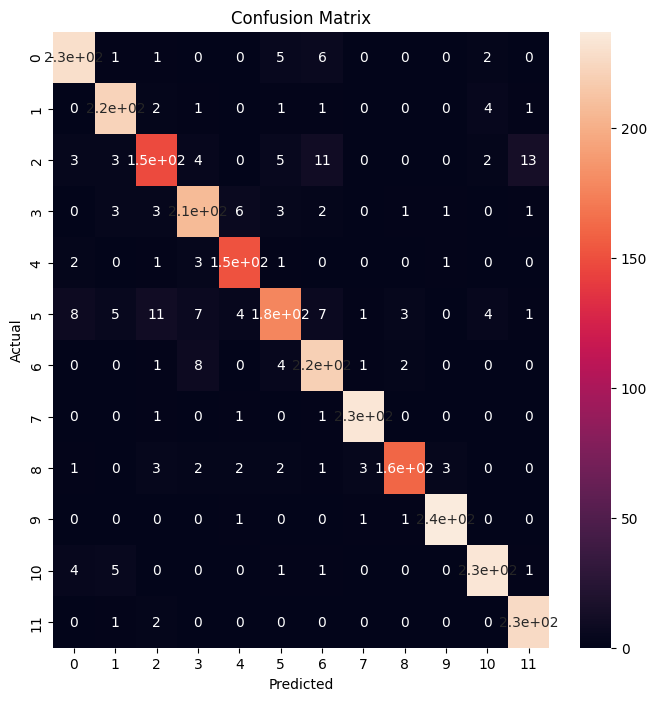

In [160]:
cm=confusion_matrix(lab,pred)
print(cm)
plt.figure(figsize=(8,8))
sns.heatmap(cm,annot=True)
plt.title("Confusion Matrix")
plt.ylabel('Actual')
plt.xlabel("Predicted")

**Visualizing**

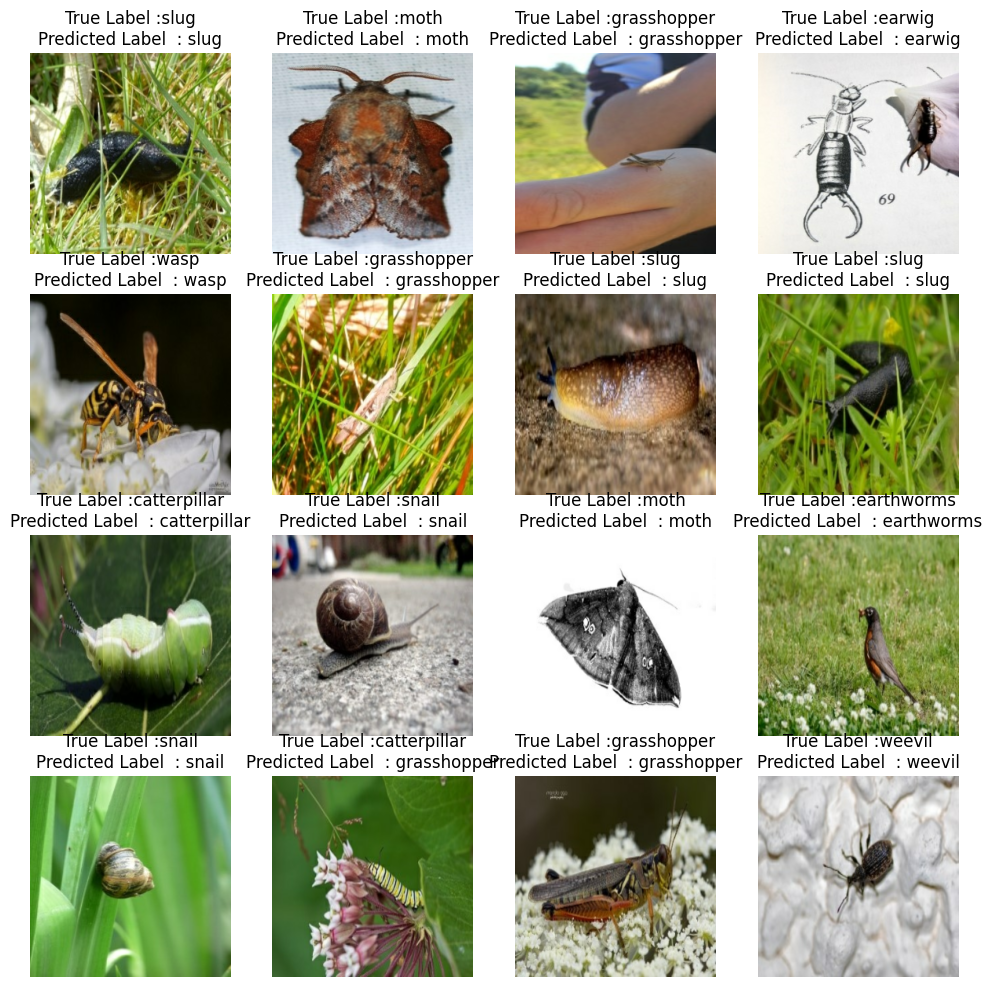

In [80]:
plt.figure(figsize=(12,12))
for   images,labels in  test_dataset.take(10):
  for i   in range(16):
   ax=plt.subplot(4,4,i+1)

   plt.imshow(images[i]/255.)
   plt.title("True Label :"+ class_name[tf.argmax(labels[i],axis=0).numpy()] + "\n" + "Predicted Label  : " + class_name[tf.argmax(lenet_model(tf.expand_dims(images[i],axis=0)),axis= -1).numpy()[0]])
   plt.axis("off")

In [172]:
from PIL import Image
def predicts(image_array):
      # Create a temporary directory
    temp_dir = tempfile.mkdtemp()

    # Define the file path for saving the image
    image_path = os.path.join(temp_dir, 'temp_image.jpg')  # Change the file format if needed

    # Save the image using OpenCV
    cv2.imwrite(image_path, image_array)
    test_img=Image.open(image_path)
    test_img=tf.image.resize(test_img, size=(configuration["img_size"], configuration["img_size"]))
    im=tf.constant(test_img,dtype=tf.float32)
    im=tf.expand_dims(im,axis=0)
    result=class_name[tf.argmax(lenet_model(im),axis= -1).numpy()[0]]
    return result.upper()

**UI**

In [89]:
! pip install gradio

     |████████████████████████████████| 20.2 MB 4.2 MB/s eta 0:00:01
  Using cached semantic_version-2.10.0-py2.py3-none-any.whl (15 kB)
  Using cached uvicorn-0.23.2-py3-none-any.whl (59 kB)
  Using cached python_multipart-0.0.6-py3-none-any.whl (45 kB)
     |████████████████████████████████| 374 kB 86 kB/s eta 0:00:011
     |████████████████████████████████| 66 kB 8.5 MB/s  eta 0:00:01
  Using cached websockets-11.0.3-cp39-cp39-manylinux_2_5_x86_64.manylinux1_x86_64.manylinux_2_17_x86_64.manylinux2014_x86_64.whl (129 kB)
  Using cached aiofiles-23.2.1-py3-none-any.whl (15 kB)
  Using cached ffmpy-0.3.1-py3-none-any.whl
     |████████████████████████████████| 138 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 298 kB 3.5 MB/s eta 0:00:01
     |████████████████████████████████| 75 kB 2.7 MB/s eta 0:00:01
  Using cached pydub-0.25.1-py2.py3-none-any.whl (32 kB)
  Using cached typing_extensions-4.8.0-py3-none-any.whl (31 kB)
     |████████████████████████████████| 1.9 MB 

      Successfully uninstalled typing-extensions-4.5.0
  Attempting uninstall: anyio
    Found existing installation: anyio 3.7.0
    Uninstalling anyio-3.7.0:
      Successfully uninstalled anyio-3.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.13.0 requires typing-extensions<4.6.0,>=3.6.6, but you have typing-extensions 4.8.0 which is incompatible.
tensorflow-probability 0.21.0 requires typing-extensions<4.6.0, but you have typing-extensions 4.8.0 which is incompatible.
skimpy 0.0.11 requires pyarrow<14.0.0,>=13.0.0, but you have pyarrow 10.0.1 which is incompatible.


In [66]:
len(train_data)

7

In [173]:
import gradio as gr

In [176]:
iface=gr.Interface(fn=predicts, inputs='image',outputs='text')
iface.launch(share=True)

Running on local URL:  http://127.0.0.1:7861
Running on public URL: https://9b5313e85475385da9.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


In [177]:
iface.close()

Closing server running on port: 7861


In [175]:
lenet_model.save('pest_model_resnet.keras')  # The file needs to end with the .keras extension


In [88]:
lenet_model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 1792)              17673823  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1792)              7168      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 100)               179300    
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

In [92]:
model = keras.models.load_model('pest_model.keras')


In [94]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 efficientnetb4 (Functional  (None, 1792)              17673823  
 )                                                               
                                                                 
 batch_normalization (Batch  (None, 1792)              7168      
 Normalization)                                                  
                                                                 
 dense (Dense)               (None, 100)               179300    
                                                                 
 batch_normalization_1 (Bat  (None, 100)               400       
 chNormalization)                                                
                                                                 
 dense_1 (Dense)             (None, 10)                1010      
                                                        

**Thanks for viewing my work.**